In [1]:
# Name : Harshit Sharma 
# University Roll No : 2015506
# Branch : B.Tech Information Technology
# Semester : 4th Semester 
# University : Graphic Era Deemed to be University 

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train_E6oV3lV.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt);
    for word in r :
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [6]:
# remove twitter handles ( @user )
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# remove speical characters, numbers and punctutations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
# individual words considered as tokens
tokenised_tweet = df['clean_tweet'].apply (lambda x : x.split())
tokenised_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
# stem the words
# other nlp techniques exists

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenised_tweet = tokenised_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence ])
tokenised_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
#combine words into single sentence 
for i in range (len(tokenised_tweet)):
    tokenised_tweet[i] = " ".join(tokenised_tweet[i])

df ['clean_tweet'] = tokenised_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


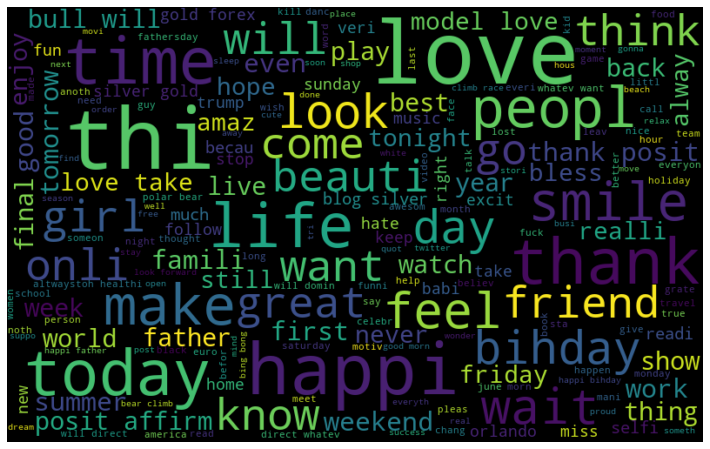

In [13]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud (width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph 
plt.figure (figsize= (15, 8))
plt.imshow (wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

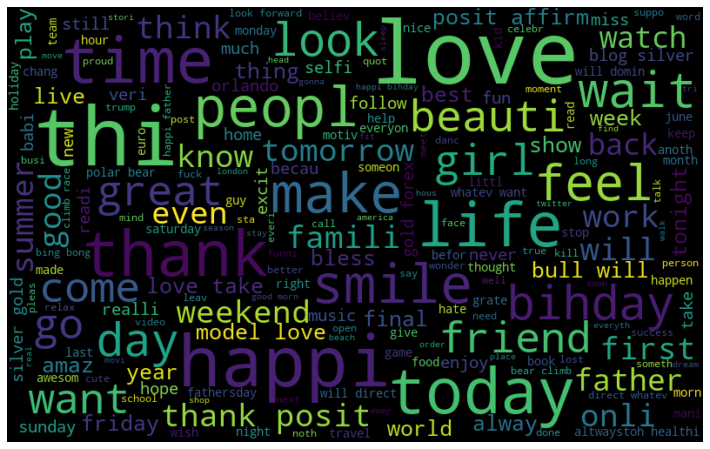

In [14]:
# frequent words visualization for +ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 0]])

wordcloud = WordCloud (width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph 
plt.figure (figsize= (15, 8))
plt.imshow (wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

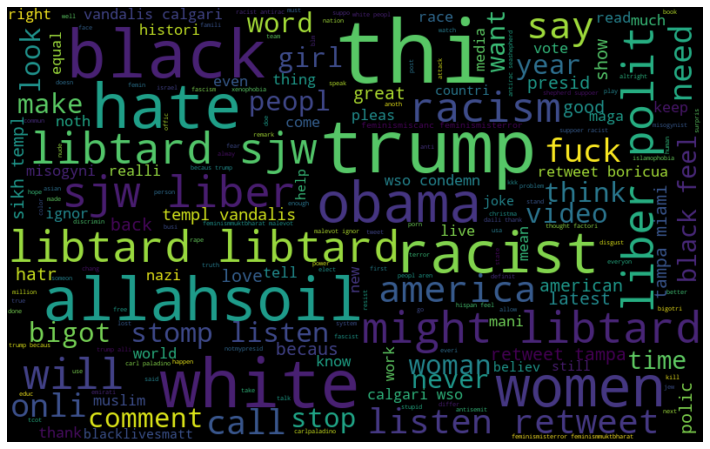

In [15]:
# frequent words visualization for -ve

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 1]])

wordcloud = WordCloud (width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph 
plt.figure (figsize= (15, 8))
plt.imshow (wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# extract the hashtag 
def hashtag_extract (tweets):
    hashtags = []
    # loop words in the tweets
    for tweet in tweets :
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [17]:
# extracts hashtags from racist/sexists tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extracts hashtags from racist/sexists tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])


In [18]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [19]:
#unnest lists
ht_positive = sum (ht_positive, [])
ht_negative = sum (ht_negative, [])

In [20]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [21]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame ({"Hashtag" : list(freq.keys()), "Count" : list (freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


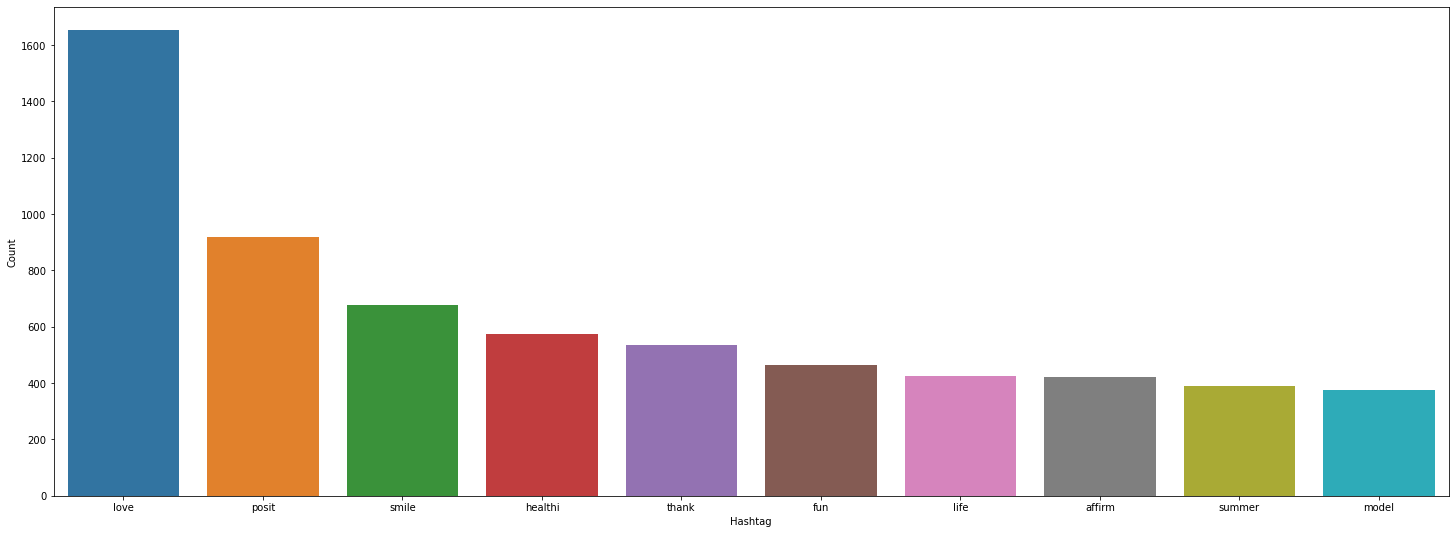

In [22]:
# select top 10 hashtags 
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(25, 9))
sns.barplot(data=d, x="Hashtag", y="Count")
plt.show()

In [23]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame ({"Hashtag" : list(freq.keys()), "Count" : list (freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


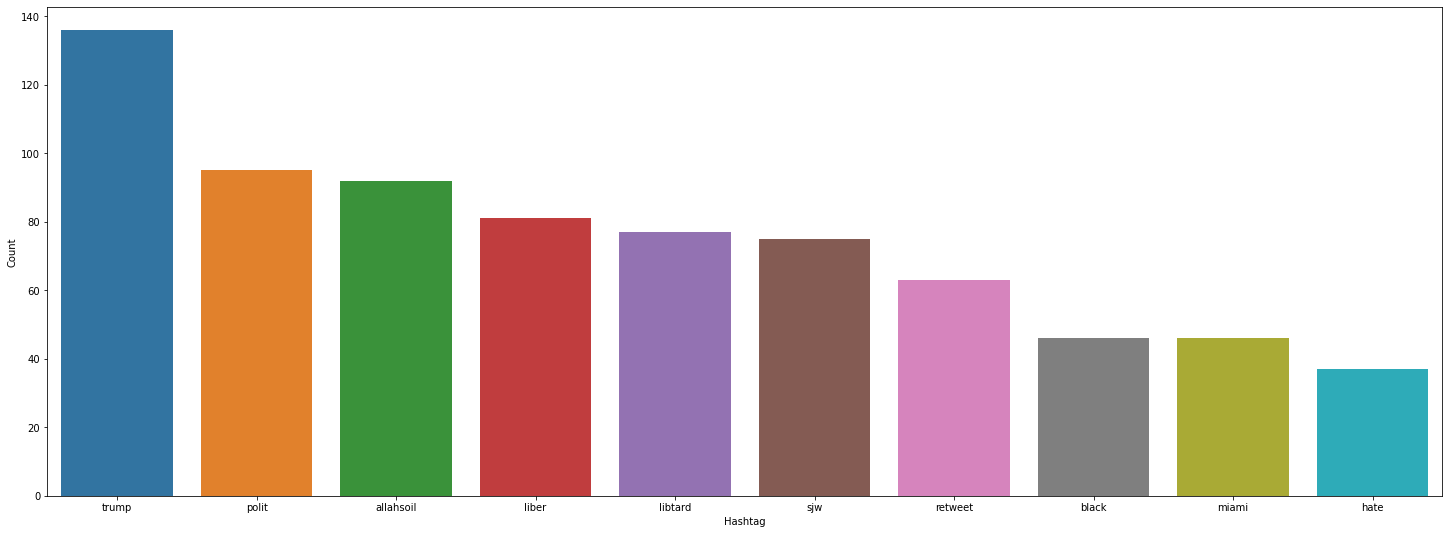

In [24]:
# select top 10 hashtags 
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(25, 9))
sns.barplot(data=d, x="Hashtag", y="Count")
plt.show()

In [25]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer (max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124813 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [28]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9469403078463271